In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import seaborn as sns
import pandas as pd
import numpy as np
import re

In [2]:
df=pd.read_csv('IncomeEvaluation.csv')

In [3]:
df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [6]:
df.columns=df.columns.str.strip()

In [7]:
df.columns=[re.sub(r'-','_',i) for i in df.columns]
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [8]:
for i in df.columns:
    if df['{}'.format(i)].dtype=='O':
        df['{}'.format(i)]=df['{}'.format(i)].str.strip()

In [9]:
intoNum={'income':{'<=50K':0,'>50K':1},
           'workclass':{'Private':0,'Self-emp-not-inc':1,'Local-gov':2,'?':3,'State-gov':4,'Self-emp-inc':5,
           'Federal-gov':6,'Without-pay':7,'Never-worked':8},
           'education':{'HS-grad':0,'Some-college':1,'Bachelors':2,'Masters':3,'Assoc-voc':4,'11th':5,'Assoc-acdm':6,
           '10th':7,'7th-8th':8,'Prof-school':9,'9th':10,'12th':11,'Doctorate':12,'5th-6th':13,'1st-4th':14,
           'Preschool':15},
           'marital_status':{'Married-civ-spouse':0,'Never-married':1,'Divorced':2,'Separated':3,'Widowed':4,
           'Married-spouse-absent':5,'Married-AF-spouse':6},
           'occupation':{'Prof-specialty':0,'Craft-repair':1,'Exec-managerial':2,'Adm-clerical':3,'Sales':4,'Other-service':5,
           'Machine-op-inspct':6,'?':7,'Transport-moving':8,'Handlers-cleaners':9,'Farming-fishing':10,'Tech-support':11,
           'Protective-serv':12,'Priv-house-serv':13,'Armed-Forces':14},
           'relationship':{'Husband':0,'Not-in-family':1,'Own-child':2,'Unmarried':3,'Wife':4,'Other-relative':5},
           'race':{'White':0,'Black':1,'Asian-Pac-Islander':2,'Amer-Indian-Eskimo':3,'Other':4},
           'sex':{'Male':0,'Female':1},
           'native_country':{'United-States':0,'Cuba':1,'Jamaica':2,'India':3,'?':4,'Mexico':5,'South':6,'Puerto-Rico':7,
                             'Honduras':8,'England':9,'Canada':10,'Germany':11,'Iran':12,'Philippines':13,
                             'Italy':14,'Poland':15,'Columbia':16,'Cambodia':17,'Thailand':18,'Ecuador':19,
                             'Laos':20,'Taiwan':21,'Haiti':22,'Portugal':23,'Dominican-Republic':24,'El-Salvador':25,
                             'France':26,'China':28,'Japan':29,'Yugoslavia':30,'Peru':31,'Outlying-US(Guam-USVI-etc)':32,
                             'Scotland':33,'Trinadad&Tobago':34,'Greece':35,'Nicaragua':36,'Vietnam':37,'Hong':38,
                             'Ireland':39,'Hungary':40,'Holand-Netherlands':41,'Guatemala':27}}

In [10]:
df=df.replace(intoNum)

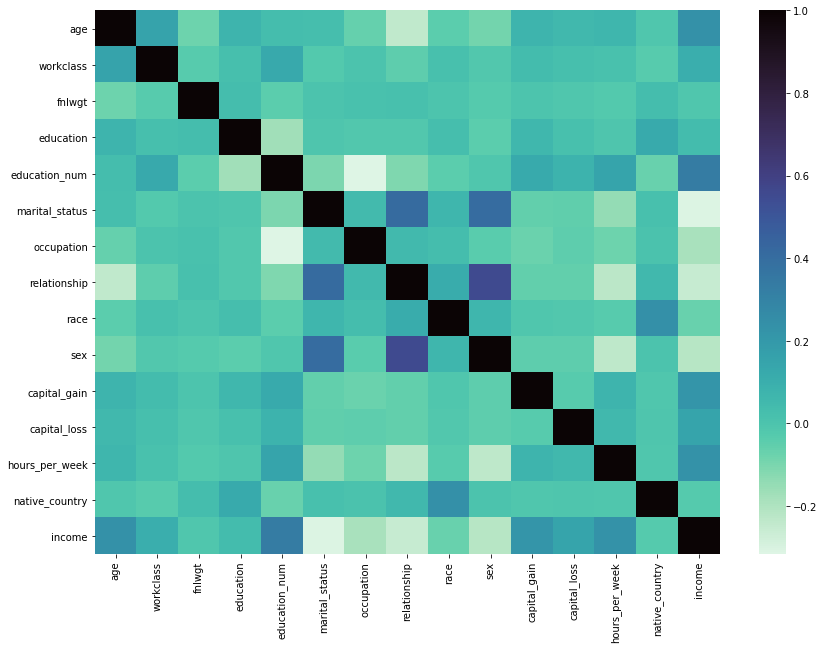

In [11]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(),cmap='mako_r')
plt.show()

In [12]:
df.drop(['fnlwgt','education','race','native_country'],axis=1,inplace=True)

In [13]:
df.head()

,age,workclass,education_num,marital_status,occupation,relationship,sex,capital_gain,capital_loss,hours_per_week,income
0,39,4,13,1,3,1,0,2174,0,40,0
1,50,1,13,0,2,0,0,0,0,13,0
2,38,0,9,2,9,1,0,0,0,40,0
3,53,0,7,0,9,0,0,0,0,40,0
4,28,0,13,0,0,4,1,0,0,40,0


In [14]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('income',axis=1),
            df.income, test_size=0.20,random_state=101)

In [15]:
model=SVC(probability=True)

In [16]:
model.fit(X_train,y_train)

SVC(probability=True)

In [17]:
y_pred=model.predict(X_test)

In [18]:
comparison=pd.DataFrame({'Actual: ':y_test,'Predicted: ':y_pred})

In [19]:
print(comparison)

       Actual:   Predicted: 
22357         0            0
26009         0            0
20734         0            0
17695         0            0
27908         1            1
...         ...          ...
17106         0            0
11372         0            0
30945         1            0
11173         0            0
22215         0            0

[6513 rows x 2 columns]


In [20]:
truepositive=confusion_matrix(y_test,y_pred)[0][0]
truenegative=confusion_matrix(y_test,y_pred)[1][1]

In [21]:
accuracy=round((truepositive+truenegative)/confusion_matrix(y_test,y_pred).sum(),2)
print(accuracy)

0.81


In [22]:
print(round(accuracy_score(y_test,y_pred),2))

0.81


In [23]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.97      0.89      4972
           1       0.75      0.28      0.41      1541

    accuracy                           0.81      6513
   macro avg       0.78      0.63      0.65      6513
weighted avg       0.80      0.81      0.77      6513



In [24]:
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])

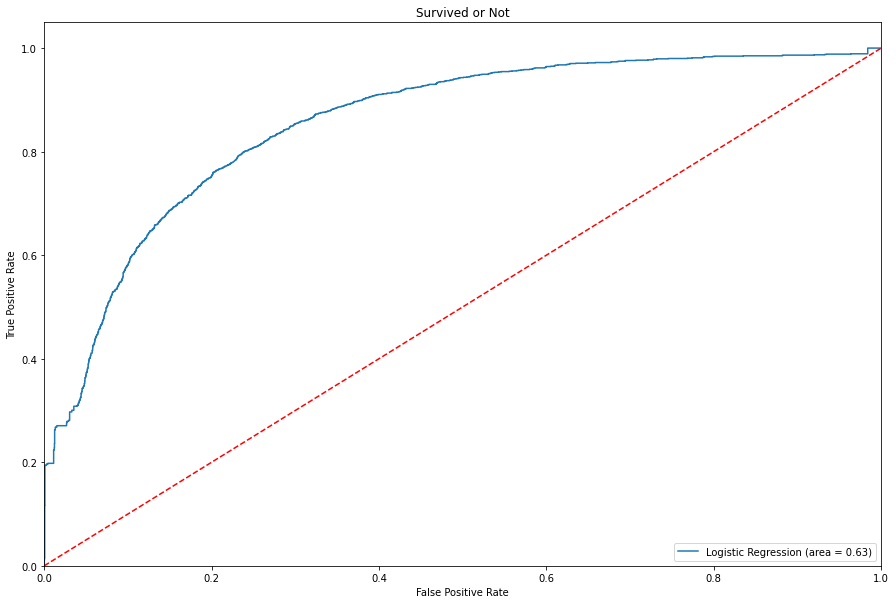

In [25]:
plt.figure(figsize=(15,10))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)'%logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Survived or Not')
plt.legend(loc="lower right")
plt.show()